Import statements

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import scale
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.metrics import log_loss
from mlxtend.plotting import scatterplotmatrix
from mlxtend.plotting import heatmap
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [28]:
header_list = ['SpMax_L', 'J_Dz(e)', 'nHM', 'F01[N-N]', 'F04[C-N]','NssssC', 'nCb-', 'C%', 'nCp', 'nO', 'F03[C-N]',
               'SdssC', 'HyWi_B(m)', 'LOC', 'SM6_L', 'F03[C-O]', 'Me', 'Mi', 'nN-N', 'nArNO2', 'nCRX3', 'SpPosA_B(p)', 
              'nCIR', 'B01[C-Br]', 'B03[C-Cl]', 'N-073', 'SpMax_A', 'Psi_i_1d', 'B04[C-Br]', 'SdO' , 'TI2_L', 'nCrt',
               'C-026', 'F02[C-N]', 'nHDon', 'SpMax_B(m)', 'Psi_i_A', 'nN', 'SM6_B(m)', 'nArCOOR', 'nX', 'TARGET']
df = pd.read_csv("NewBioDeg.csv", names = header_list)
columns = df.columns
df.head()

,SpMax_L,J_Dz(e),nHM,F01[N-N],F04[C-N],NssssC,nCb-,C%,nCp,nO,...,C-026,F02[C-N],nHDon,SpMax_B(m),Psi_i_A,nN,SM6_B(m),nArCOOR,nX,TARGET
0,3.919,2.6909,0.0,0.0,0.0,0.0,0.0,31.4,2.0,0.0,...,0.0,0.0,0.0,2.949,1.591,0.0,7.253,0.0,0.0,RB
1,4.170,2.1144,0.0,0.0,0.0,0.0,0.0,30.8,1.0,1.0,...,0.0,0.0,0.0,3.315,1.967,0.0,7.257,0.0,0.0,RB
2,3.932,3.2512,0.0,0.0,0.0,0.0,0.0,26.7,2.0,4.0,...,0.0,0.0,1.0,3.076,2.417,0.0,7.601,0.0,0.0,RB
3,3.000,2.7098,0.0,0.0,0.0,0.0,0.0,20.0,0.0,2.0,...,0.0,0.0,NaN,3.046,5.000,0.0,6.690,0.0,0.0,RB
4,4.236,NaN,0.0,0.0,0.0,0.0,0.0,29.4,2.0,4.0,...,0.0,0.0,0.0,3.351,2.405,0.0,8.003,0.0,0.0,RB


Change target class labels to '0' for 'NRB' and '1' for 'RB'. There are almost twice as many '0' than '1', so stratifying the data when doing the train-test split is necessary.

In [29]:
df.replace('RB', 1, inplace=True)
df.replace('NRB', 0, inplace=True)
print(df['TARGET'].value_counts())

0    699
1    356
Name: TARGET, dtype: int64


Now let's look at the missing values in the data. If we drop columns with any missing data altogether, we only have 787 out of 1055 examples to work with. Instead, we decide to impute the data. Note that there are both categorical/binary and numerical features. We try to impute the categorical ones with (???) and numerical ones with the mean.

In [30]:
for c in columns:
    print(c + ": " + str(len(df[c].unique())))
print("Original number of examples: " + str(len(df)))
print("After dropping NAN: " + str(len(df.dropna())))
df['SpMax_L'].fillna(df['SpMax_L'].mean(), inplace=True)

SpMax_L: 441
J_Dz(e): 1016
nHM: 12
F01[N-N]: 5
F04[C-N]: 16
NssssC: 14
nCb-: 16
C%: 189
nCp: 16
nO: 13
F03[C-N]: 22
SdssC: 383
HyWi_B(m): 752
LOC: 372
SM6_L: 510
F03[C-O]: 25
Me: 168
Mi: 126
nN-N: 4
nArNO2: 5
nCRX3: 5
SpPosA_B(p): 352
nCIR: 14
B01[C-Br]: 3
B03[C-Cl]: 3
N-073: 5
SpMax_A: 330
Psi_i_1d: 206
B04[C-Br]: 3
SdO: 470
TI2_L: 551
nCrt: 9
C-026: 12
F02[C-N]: 16
nHDon: 9
SpMax_B(m): 702
Psi_i_A: 623
nN: 9
SM6_B(m): 860
nArCOOR: 6
nX: 18
TARGET: 2
Original number of examples: 1055
After dropping NAN: 787


In [ ]:
# scatterplotmatrix(df[columns].values, figsize=(50, 50), names=columns, alpha=0.8)
# plt.tight_layout()
# plt.show()

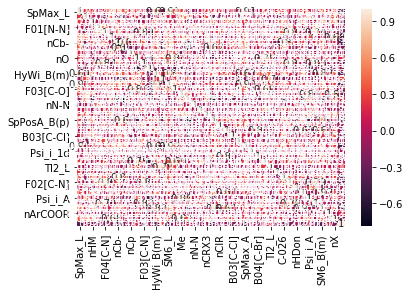

In [34]:
corr = df.corr()
sns.heatmap(corr, annot = True)
#cm = np.corrcoef(df[df.columns].values.T)
#hm = heatmap(cm, row_names=df.columns, column_names=df.columns)
plt.show()